<a href="https://colab.research.google.com/github/BaronVonBussin/Stuff/blob/main/garch_example1_20241219.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.1/985.1 kB 16.0 MB/s eta 0:00:00


In [5]:
!pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 3.0 MB/s eta 0:00:00


[*********************100%***********************]  1 of 1 completed


NameError: name 'candlestick_ohlc' is not defined

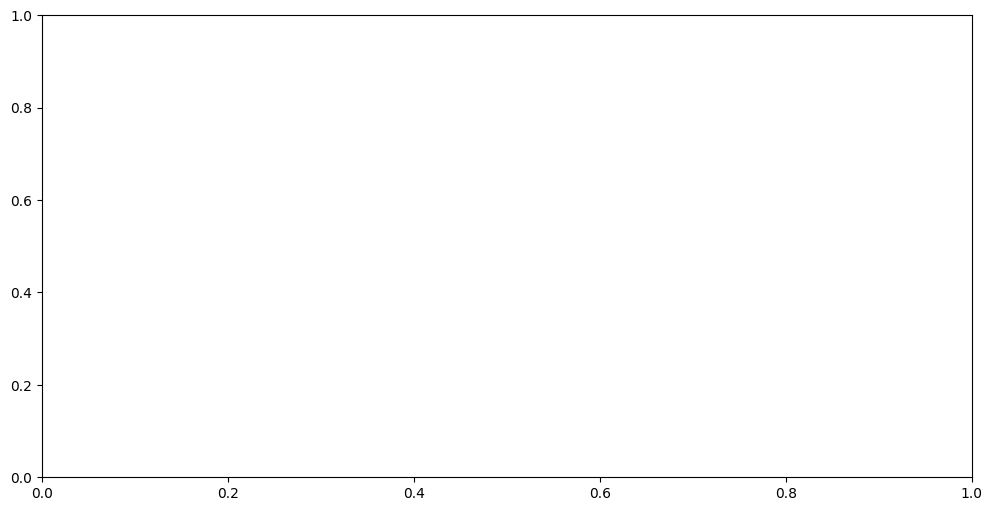

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import matplotlib.dates as mdates
from arch import arch_model
from mplfinance.plotting import plot

# Step 1: Download SPY daily data for 2013
spy = yf.download('SPY', start='2013-01-01', end='2013-12-31')

# Prepare OHLC data
spy['Date'] = spy.index
spy['Date'] = spy['Date'].apply(mdates.date2num)
ohlc = spy[['Date', 'Open', 'High', 'Low', 'Close']]

# Step 2: Plot OHLC chart
fig, ax = plt.subplots(figsize=(12, 6))
candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red')
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.title('SPY OHLC Chart (2013)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid()
plt.show()

# Step 3: Calculate daily returns
spy['Return'] = np.log(spy['Close'] / spy['Close'].shift(1)).dropna()
returns = spy['Return'].dropna()

# Step 4: Fit a GARCH(1,1) model
model = arch_model(returns, vol='Garch', p=1, q=1)
garch_fit = model.fit(disp='off')

# Extract results
conditional_volatility = garch_fit.conditional_volatility
standardized_residuals = garch_fit.resid / garch_fit.conditional_volatility

# Step 5: Plot Conditional Volatility
plt.figure(figsize=(12, 6))
plt.plot(conditional_volatility, label='Conditional Volatility', color='orange')
plt.title('GARCH(1,1) Conditional Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.grid()
plt.legend()
plt.show()

# Step 6: Histogram of Standardized Residuals
plt.figure(figsize=(12, 6))
plt.hist(standardized_residuals, bins=30, color='green', alpha=0.7, edgecolor='black')
plt.title('Histogram of Standardized Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid()
plt.show()

# Step 7: Q-Q Plot of Residuals
import scipy.stats as stats

plt.figure(figsize=(12, 6))
stats.probplot(standardized_residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Standardized Residuals')
plt.grid()
plt.show()

# Step 8: Print Model Summary
print(garch_fit.summary())


[*********************100%***********************]  1 of 1 completed


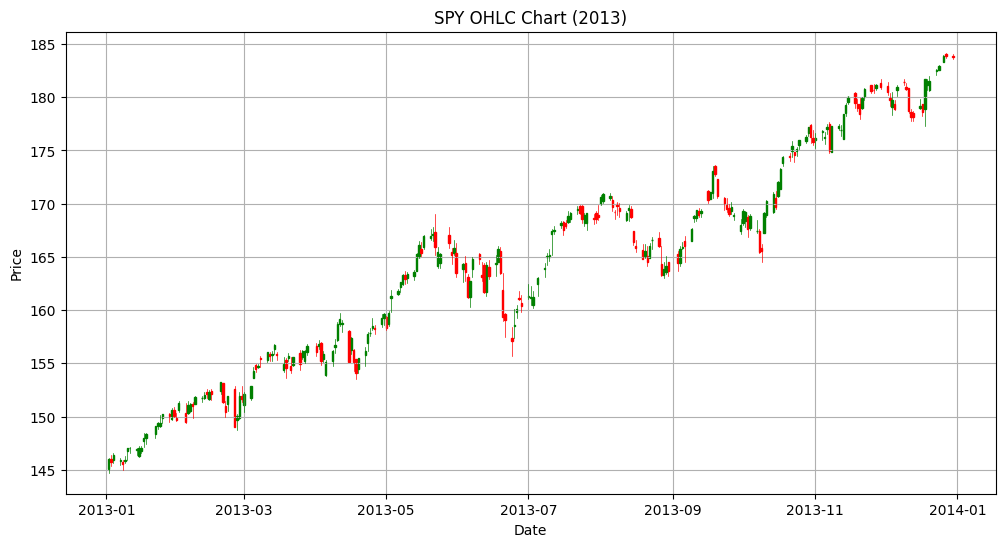

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 4.696e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


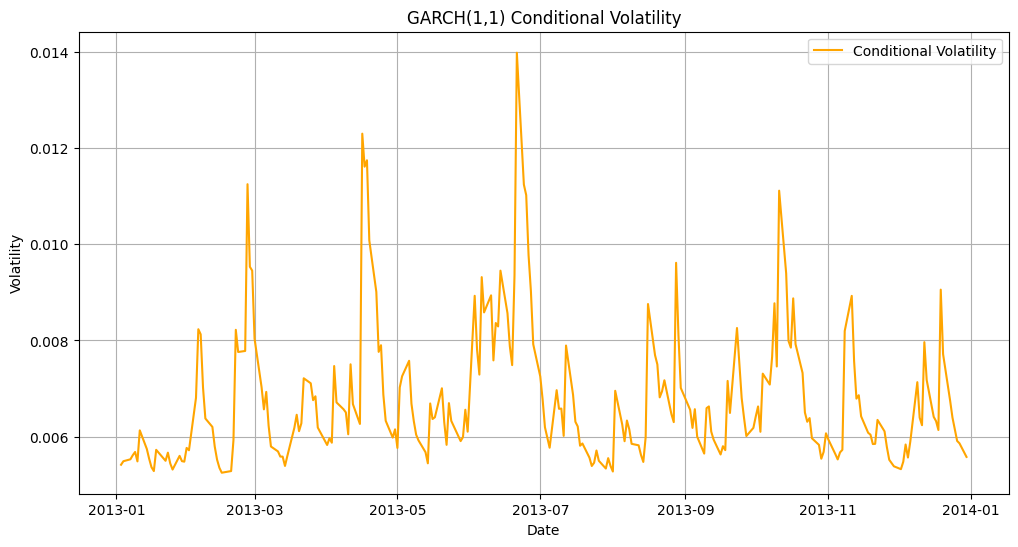

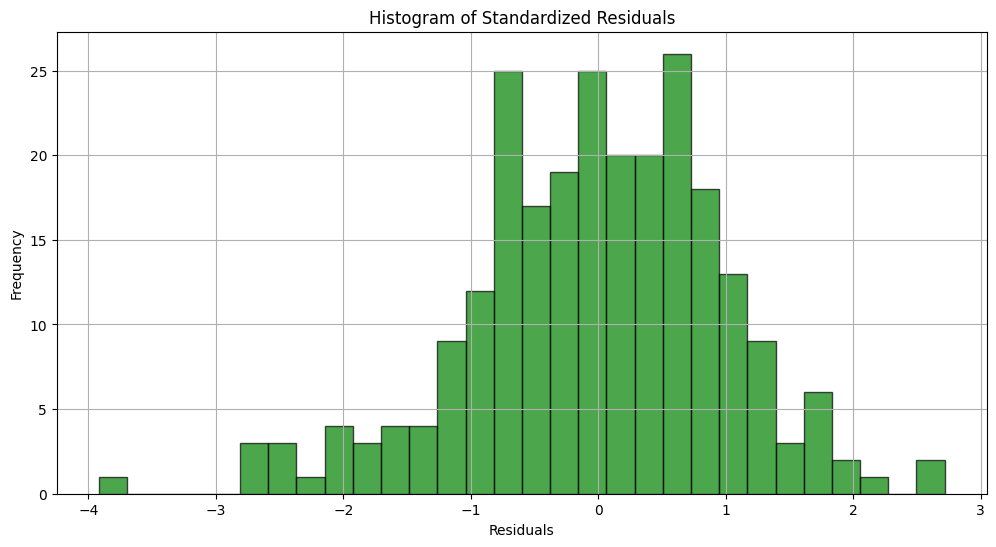

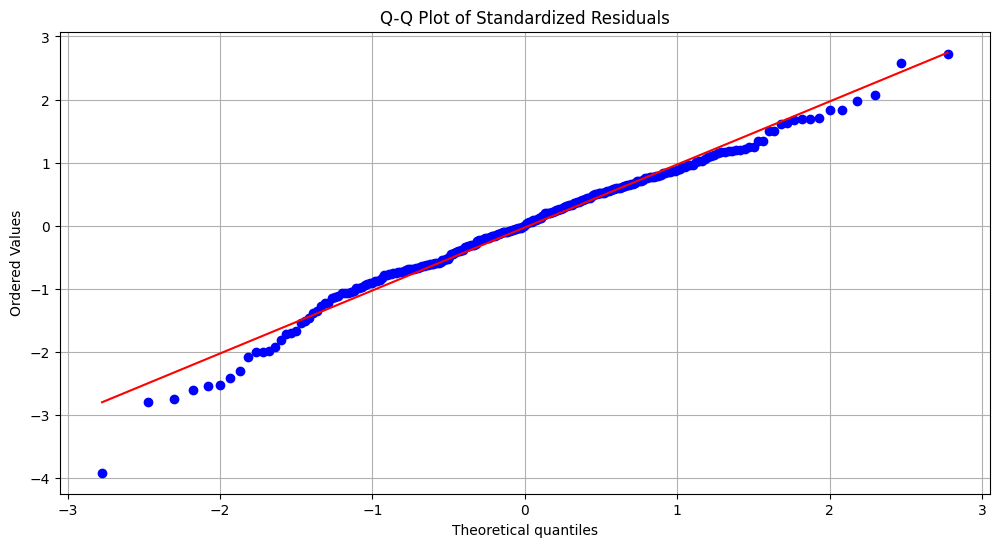

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                 Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                898.603
Distribution:                  Normal   AIC:                          -1789.21
Method:            Maximum Likelihood   BIC:                          -1775.12
                                        No. Observations:                  250
Date:                Fri, Dec 20 2024   Df Residuals:                      249
Time:                        11:04:29   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         1.0690e-03  6.296e-07   1697.800      0.000 [1.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc
from arch import arch_model

# Step 1: Download SPY daily data for 2013
spy = yf.download('SPY', start='2013-01-01', end='2013-12-31')

# Prepare OHLC data
spy['Date'] = spy.index
spy['Date'] = spy['Date'].apply(mdates.date2num)
ohlc = spy[['Date', 'Open', 'High', 'Low', 'Close']]

# Step 2: Plot OHLC chart
fig, ax = plt.subplots(figsize=(12, 6))
candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red')
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.title('SPY OHLC Chart (2013)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid()
plt.show()

# Step 3: Calculate daily returns
spy['Return'] = np.log(spy['Close'] / spy['Close'].shift(1)).dropna()
returns = spy['Return'].dropna()

# Step 4: Fit a GARCH(1,1) model
model = arch_model(returns, vol='Garch', p=1, q=1)
garch_fit = model.fit(disp='off')

# Extract results
conditional_volatility = garch_fit.conditional_volatility
standardized_residuals = garch_fit.resid / garch_fit.conditional_volatility

# Step 5: Plot Conditional Volatility
plt.figure(figsize=(12, 6))
plt.plot(conditional_volatility, label='Conditional Volatility', color='orange')
plt.title('GARCH(1,1) Conditional Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.grid()
plt.legend()
plt.show()

# Step 6: Histogram of Standardized Residuals
plt.figure(figsize=(12, 6))
plt.hist(standardized_residuals, bins=30, color='green', alpha=0.7, edgecolor='black')
plt.title('Histogram of Standardized Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid()
plt.show()

# Step 7: Q-Q Plot of Residuals
import scipy.stats as stats

plt.figure(figsize=(12, 6))
stats.probplot(standardized_residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Standardized Residuals')
plt.grid()
plt.show()

# Step 8: Print Model Summary
print(garch_fit.summary())


[*********************100%***********************]  1 of 1 completed


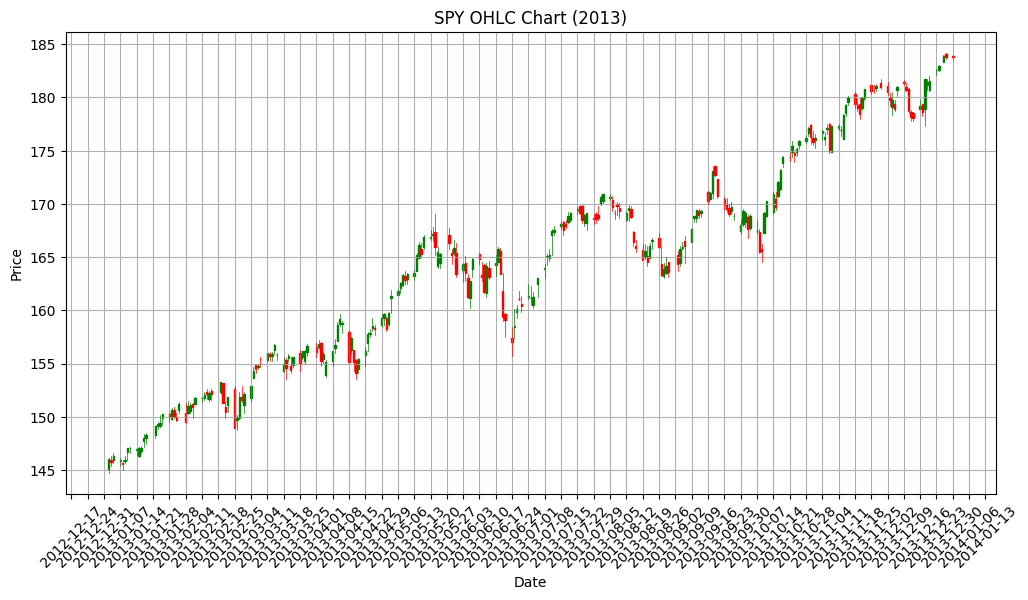

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 4.696e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


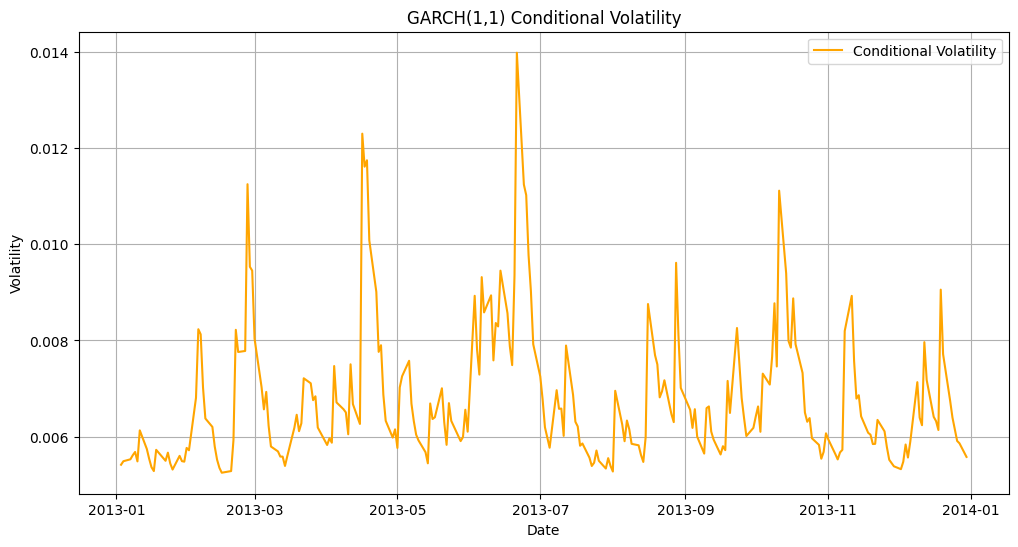

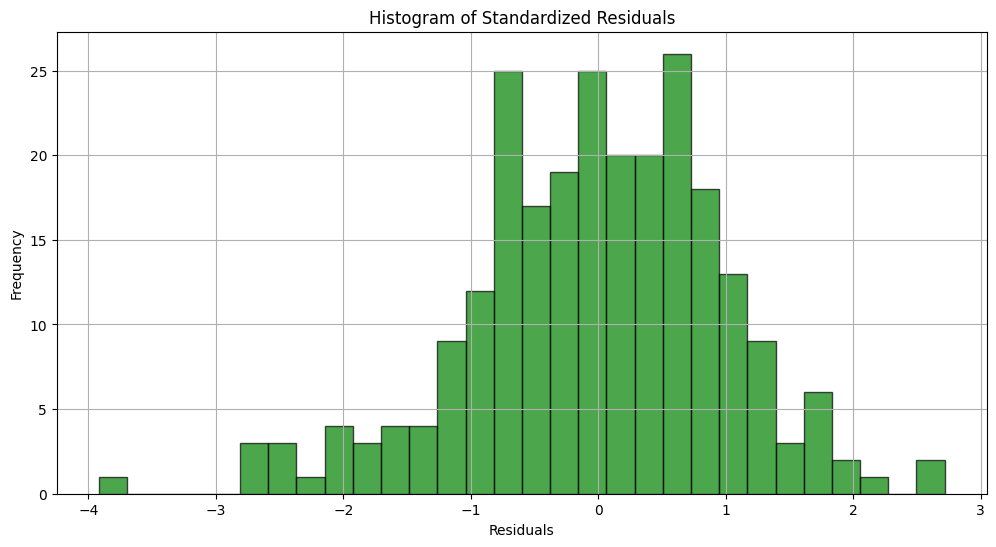

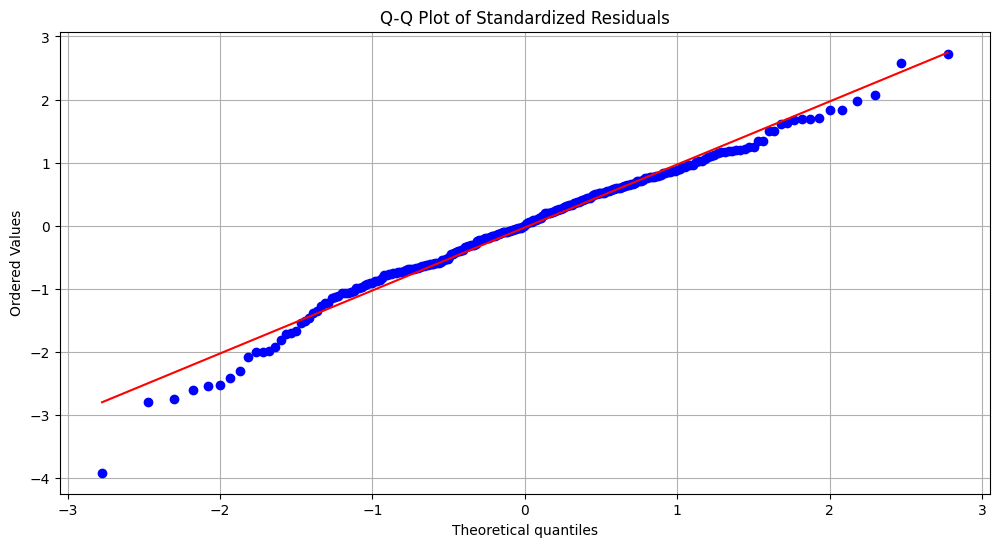

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                 Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                898.603
Distribution:                  Normal   AIC:                          -1789.21
Method:            Maximum Likelihood   BIC:                          -1775.12
                                        No. Observations:                  250
Date:                Fri, Dec 20 2024   Df Residuals:                      249
Time:                        11:06:11   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         1.0690e-03  6.296e-07   1697.800      0.000 [1.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc
from arch import arch_model

# Step 1: Download SPY daily data for 2013
spy = yf.download('SPY', start='2013-01-01', end='2013-12-31')

# Prepare OHLC data
spy['Date'] = spy.index
spy['Date'] = spy['Date'].apply(mdates.date2num)
ohlc = spy[['Date', 'Open', 'High', 'Low', 'Close']]

# Step 2: Plot OHLC chart (Suppress non-market dates)
fig, ax = plt.subplots(figsize=(12, 6))
candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red')
ax.xaxis_date()
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.title('SPY OHLC Chart (2013)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid()
plt.xticks(rotation=45)
plt.show()

# Step 3: Calculate daily returns
spy['Return'] = np.log(spy['Close'] / spy['Close'].shift(1)).dropna()
returns = spy['Return'].dropna()

# Step 4: Fit a GARCH(1,1) model
model = arch_model(returns, vol='Garch', p=1, q=1)
garch_fit = model.fit(disp='off')

# Extract results
conditional_volatility = garch_fit.conditional_volatility
standardized_residuals = garch_fit.resid / garch_fit.conditional_volatility

# Step 5: Plot Conditional Volatility
plt.figure(figsize=(12, 6))
plt.plot(conditional_volatility, label='Conditional Volatility', color='orange')
plt.title('GARCH(1,1) Conditional Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.grid()
plt.legend()
plt.show()

# Step 6: Histogram of Standardized Residuals
plt.figure(figsize=(12, 6))
plt.hist(standardized_residuals, bins=30, color='green', alpha=0.7, edgecolor='black')
plt.title('Histogram of Standardized Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid()
plt.show()

# Step 7: Q-Q Plot of Residuals
import scipy.stats as stats

plt.figure(figsize=(12, 6))
stats.probplot(standardized_residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Standardized Residuals')
plt.grid()
plt.show()

# Step 8: Print Model Summary
print(garch_fit.summary())


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import mplfinance as mpf
from arch import arch_model

# Step 1: Download SPY daily data for 2013
spy = yf.download('SPY', start='2013-01-01', end='2013-12-31')

# Debug: Display first few rows of data and column info
print("First few rows of SPY data:")
print(spy.head())

print("\nData types in SPY data:")
print(spy.dtypes)

print("\nChecking for NaN values in SPY data:")
print(spy.isna().sum())

# Prepare OHLC data
ohlc = spy[['Open', 'High', 'Low', 'Close']].copy()

# Ensure all OHLC columns are numeric
ohlc = ohlc.apply(pd.to_numeric, errors='coerce').dropna()  # Coerce non-numeric values and drop rows with NaN

# Debug: Check OHLC after cleaning
print("\nFirst few rows of OHLC after cleaning:")
print(ohlc.head())

# Ensure index is datetime
ohlc.index = pd.to_datetime(ohlc.index)

# Debug: Confirm index is datetime
print("\nOHLC index type:", type(ohlc.index[0]))

# Step 2: Plot OHLC chart
try:
    mpf.plot(
        ohlc,
        type='candle',
        show_nontrading=False,
        figratio=(12, 6),
        title='SPY OHLC Chart (2013)',
        xrotation=45
    )
    print("\nOHLC chart successfully plotted!")
except Exception as e:
    print("\nError during OHLC chart plotting:", str(e))


[*********************100%***********************]  1 of 1 completed

First few rows of SPY data:
Price        Adj Close       Close        High         Low        Open  \
Ticker             SPY         SPY         SPY         SPY         SPY   
Date                                                                     
2013-01-02  118.375786  146.059998  146.149994  144.729996  145.110001   
2013-01-03  118.108269  145.729996  146.369995  145.339996  145.990005   
2013-01-04  118.626976  146.369995  146.610001  145.669998  145.970001   
2013-01-07  118.302803  145.970001  146.110001  145.429993  145.850006   
2013-01-08  117.962410  145.550003  145.910004  144.979996  145.710007   

Price          Volume  
Ticker            SPY  
Date                   
2013-01-02  192059000  
2013-01-03  144761800  
2013-01-04  116817700  
2013-01-07  110002500  
2013-01-08  121265100  

Data types in SPY data:
Price      Ticker
Adj Close  SPY       float64
Close      SPY       float64
High       SPY       float64
Low        SPY       float64
Open       SPY       float64

First few rows of the dataset:
                   Open         High          Low        Close
Date                                                          
2012-09-06  1403.739990  1432.119995  1403.739990  1432.119995
2012-09-07  1432.119995  1437.920044  1431.449951  1437.920044
2012-09-10  1437.920044  1438.739990  1428.979980  1429.079956
2012-09-11  1429.130005  1437.760010  1429.130005  1433.560059
2012-09-12  1433.560059  1439.150024  1432.989990  1436.560059


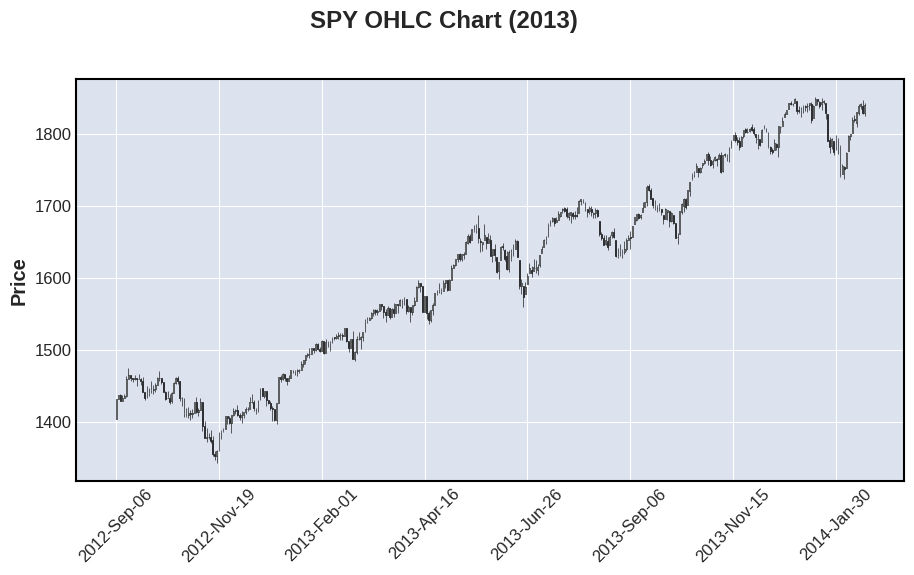


OHLC chart successfully plotted!


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 5.3e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


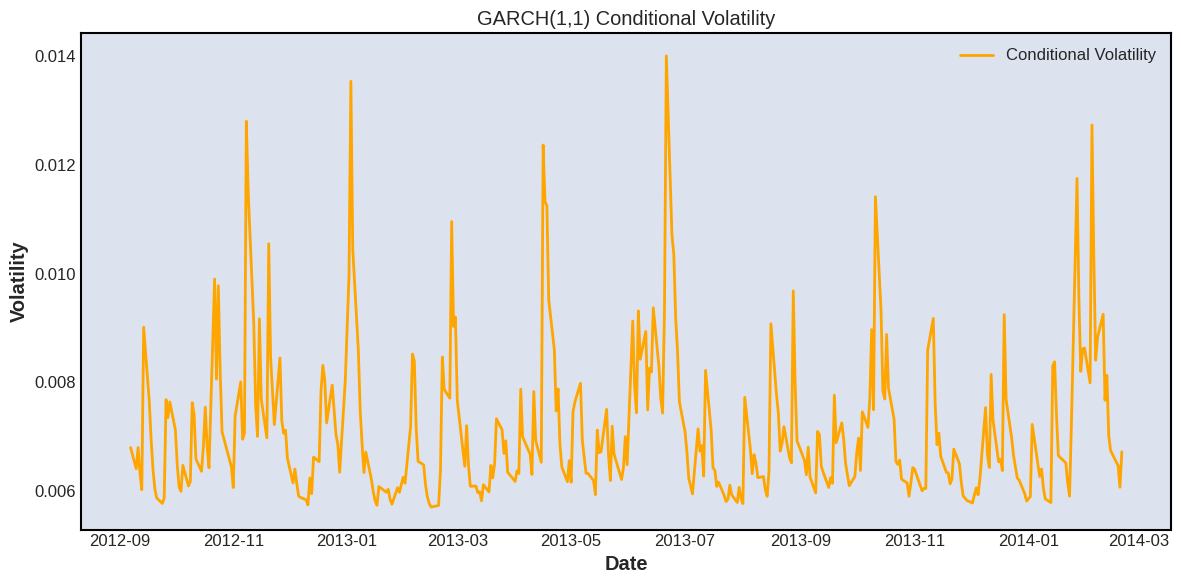

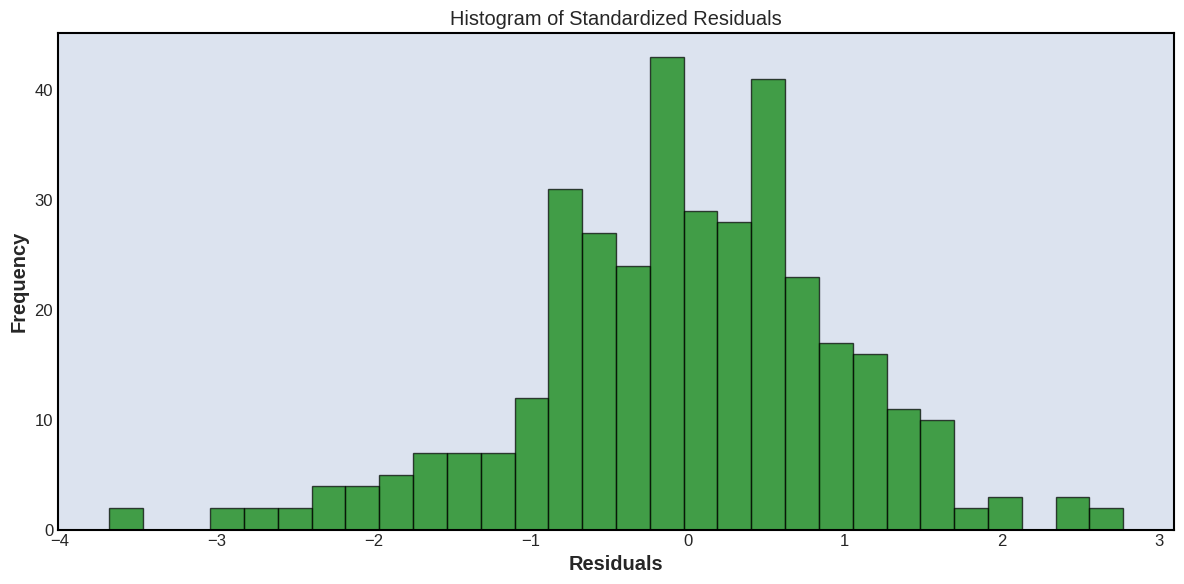

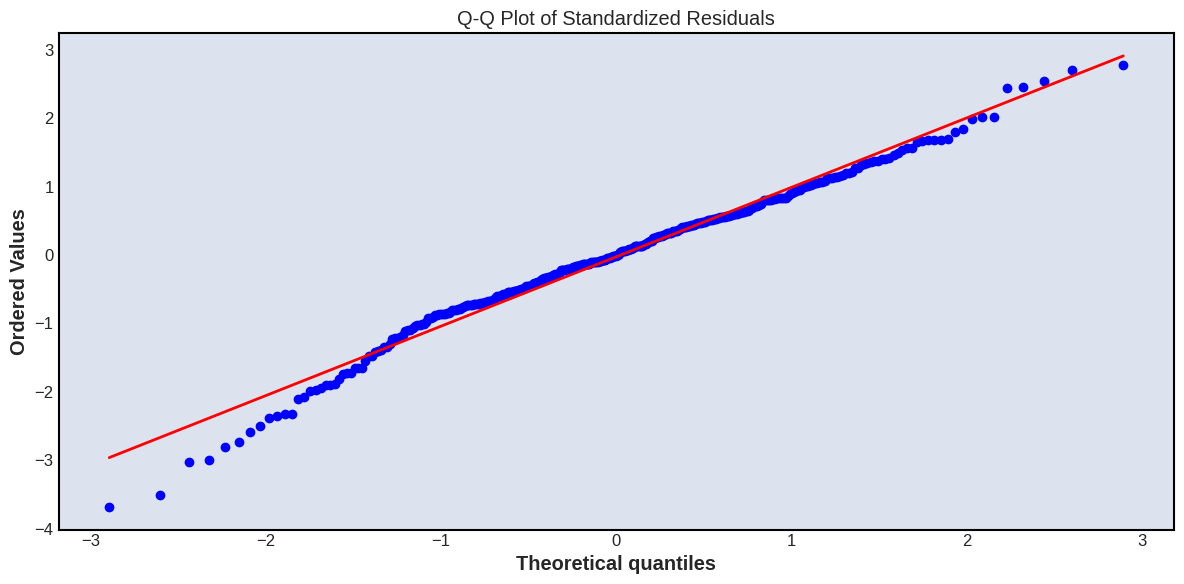

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                 Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                1281.17
Distribution:                  Normal   AIC:                          -2554.35
Method:            Maximum Likelihood   BIC:                          -2538.76
                                        No. Observations:                  364
Date:                Fri, Dec 20 2024   Df Residuals:                      363
Time:                        11:38:27   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         8.1791e-04  3.630e-04      2.253  2.426e-02 [1.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpf
from arch import arch_model

# Step 1: Load the CSV data
file_path = '/content/SPX_2013.csv'  # Adjust path as needed
data = pd.read_csv(file_path)

# Ensure the 'Date' column is in datetime format and set it as the index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Debug: Check the first few rows
print("First few rows of the dataset:")
print(data.head())

# Ensure columns are numeric
ohlc = data[['Open', 'High', 'Low', 'Close']].apply(pd.to_numeric, errors='coerce').dropna()

# Step 2: Plot OHLC chart with non-trading days suppressed
try:
    mpf.plot(
        ohlc,
        type='candle',
        show_nontrading=False,
        figratio=(12, 6),
        title='SPY OHLC Chart (2013)',
        xrotation=45
    )
    print("\nOHLC chart successfully plotted!")
except Exception as e:
    print("\nError during OHLC chart plotting:", str(e))

# Step 3: Calculate daily returns
ohlc['Return'] = np.log(ohlc['Close'] / ohlc['Close'].shift(1)).dropna()

# Step 4: Fit a GARCH(1,1) model
returns = ohlc['Return'].dropna()
model = arch_model(returns, vol='Garch', p=1, q=1)
garch_fit = model.fit(disp='off')

# Extract results
conditional_volatility = garch_fit.conditional_volatility
standardized_residuals = garch_fit.resid / garch_fit.conditional_volatility

# Step 5: Plot Conditional Volatility
plt.figure(figsize=(12, 6))
plt.plot(conditional_volatility, label='Conditional Volatility', color='orange')
plt.title('GARCH(1,1) Conditional Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

# Step 6: Histogram of Standardized Residuals
plt.figure(figsize=(12, 6))
plt.hist(standardized_residuals, bins=30, color='green', alpha=0.7, edgecolor='black')
plt.title('Histogram of Standardized Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid()
plt.tight_layout()
plt.show()

# Step 7: Q-Q Plot of Residuals
import scipy.stats as stats

plt.figure(figsize=(12, 6))
stats.probplot(standardized_residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Standardized Residuals')
plt.grid()
plt.tight_layout()
plt.show()

# Step 8: Print Model Summary
print(garch_fit.summary())
